# Deep Learning


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop 
from keras.datasets import fashion_mnist # data set


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


###  Load the dataset

1. load the `fashion_mnist` dataset

2. preprocess the data:

 a) reshape `x` (train and test)to flat-vector representations: (N, 28x28)
 
 b) change the casting of `x` to `float32`
 
 c) normalize `x` by dividing its values by 255
 
 d) convert `y` to categorical "one-hot" representation (use: `keras.utils.to_categorical`)
 


(60000, 28, 28)
(60000,)
(60000, 784)
(60000, 10)


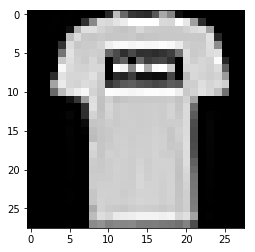

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(y_train.shape)

plt.imshow(x_train[1,:],'gray');

x_train = (x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]).astype(np.float32)) / 255
x_test = (x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]).astype(np.float32)) / 255

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(x_train.shape)
print(y_train.shape)



### 0-layers network

Create a 0-layers network, with only 10 output units (one for each class, with softmax activation).

Train and evaluate the network. Plot the results (loss and accuracy as a function of training epochs) for the training/testing data.

What is the maximal test accuracy you can achieve?


Epoch 1/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.6935 - acc: 0.7690
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.4963 - acc: 0.8329: 0s - loss: 0.
Epoch 3/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.4624 - acc: 0.8427
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.4454 - acc: 0.8489
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.4340 - acc: 0.8525
Epoch 6/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.4256 - acc: 0.8547
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.4196 - acc: 0.8566
Epoch 8/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.4147 - acc: 0.8578
Epoch 9/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.4107 - acc: 0.8594
Epoch 10/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.408

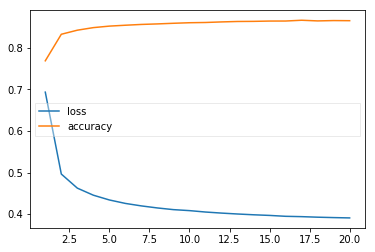

final :
loss = 0.44823038945198057  , accuracy = 0.8493


In [3]:
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(10, input_dim=x_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


fr = model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

x_epochs = list(range(1, 20 + 1))
y_loss = fr.history['loss']
y_acc = fr.history['acc']

plt.plot(x_epochs, y_loss, label = 'loss')
plt.plot(x_epochs, y_acc, label = 'accuracy')

leg = plt.legend(loc='best', ncol=1, mode="expand", shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.4)

plt.show()

print('final :\nloss =', score[0], ' , accuracy =', score[1])

# max accuracy ~ 0.8675

### 1-hidden layer network

Add a fully connected hidden layer (64 units with ReLU activation).

Train and evaluate the network. Plot the results (loss and accuracy as a function of training epochs) for the training/testing data.

What is the maximal test accuracy you can achieve?


Epoch 1/20
60000/60000 [==============================] - 5s 85us/step - loss: 1.1048 - acc: 0.6524
Epoch 2/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.5811 - acc: 0.7595
Epoch 3/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.5203 - acc: 0.7970
Epoch 4/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.4689 - acc: 0.8339
Epoch 5/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.4333 - acc: 0.8486
Epoch 6/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.4149 - acc: 0.8548
Epoch 7/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.4009 - acc: 0.8597
Epoch 8/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.3908 - acc: 0.8626
Epoch 9/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.3816 - acc: 0.8667
Epoch 10/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.3739 - ac

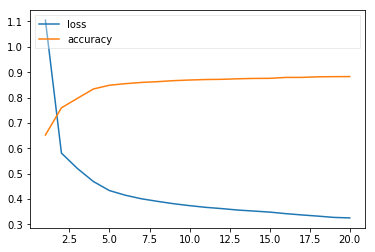

final :
loss = 0.4077820971250534  , accuracy = 0.8624


In [4]:
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='softmax'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


fr = model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

x_epochs = list(range(1, 20 + 1))
y_loss = fr.history['loss']
y_acc = fr.history['acc']

plt.plot(x_epochs, y_loss, label = 'loss')
plt.plot(x_epochs, y_acc, label = 'accuracy')

leg = plt.legend(loc='best', ncol=1, mode="expand", shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.4)

plt.show()

print('final :\nloss =', score[0], ' , accuracy =', score[1])

# max accuracy ~ 0.8882

### Exploring architectures

Try different architecutes: 

- try changing the number of units in the hidden layer (20, 100, 1000??)
- try changing the number of hidden layers (is deeper better than wider?)
- try adding dropout layers 

Summarize all your findings (in graphs and text/table).



----------------------- Description of the Model -----------------------------

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________
None 


Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.6330 - acc: 0.7766
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.

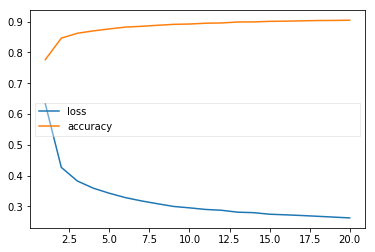

final :
loss = 0.4153745903015137  , accuracy = 0.87 




----------------------- Description of the Model -----------------------------

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
____

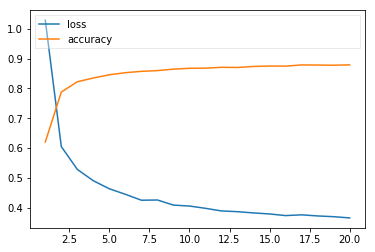

final :
loss = 0.4317686444282532  , accuracy = 0.8697


In [10]:
import matplotlib.pyplot as plt
# from keras.utils.vis_utils import plot_model


# one hidden layer 128 bits with dropout

model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('----------------------- Description of the Model -----------------------------\n')
print(model.summary(), '\n\n')

fr = model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

x_epochs = list(range(1, 20 + 1))
y_loss = fr.history['loss']
y_acc = fr.history['acc']

plt.plot(x_epochs, y_loss, label = 'loss')
plt.plot(x_epochs, y_acc, label = 'accuracy')

leg = plt.legend(loc='best', ncol=1, mode="expand", shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.4)


# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

plt.show()

print('final :\nloss =', score[0], ' , accuracy =', score[1], '\n\n\n\n')



# three hidden layer 64 bits with dropout

model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('----------------------- Description of the Model -----------------------------\n')
print(model.summary(), '\n\n')


fr = model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

x_epochs = list(range(1, 20 + 1))
y_loss = fr.history['loss']
y_acc = fr.history['acc']

plt.plot(x_epochs, y_loss, label = 'loss')
plt.plot(x_epochs, y_acc, label = 'accuracy')

leg = plt.legend(loc='best', ncol=1, mode="expand", shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.4)


# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

plt.show()

print('final :\nloss =', score[0], ' , accuracy =', score[1])


# the first model ( with less but bigger layers found to be better)


## Good Luck!